In [1]:
#DESCARGAMOS LOS MODULOS PARA PODER CORRER EL SCRIPT
import pandas as pd
import numpy as np
import requests
import config
import time
from datetime import datetime, date, timedelta
from scipy import stats
import matplotlib.pyplot as plt
import functions as fn
import datetime
from datetime import datetime,time,date,timedelta
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import os
import time
import glob
import math
import pylab

In [2]:
folder = './2019-2020'
allFiles = glob.glob(folder + "/*.xlsx")
list_ = []
for file_ in allFiles:
    df = pd.read_excel(file_)
    list_.append(df)
frame = pd.concat(list_)
frame.head()

,Asociación Nacional de Universidades e Instituciones de Educación Superior - ANUIES,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,"Estadística de Educación Superior, Ciclo escol...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENTIDAD FEDERATIVA,MUNICIPIO,ANUIES,NOMBRE INSTITUCIÓN,NOMBRE ESCUELA/CAMPUS/PLANTEL,NIVEL DE ESTUDIOS,NOMBRE PROGRAMA EDUCATIVO,Matrícula Mujeres,Matrícula Hombres,Matrícula Total,Nuevo Ingreso Mujeres,Nuevo Ingreso Hombres,Nuevo Ingreso Total,Lugares Ofertados Total,Modalidad,Institucion,Ciclo,Tipo
3,AGUASCALIENTES,AGUASCALIENTES,INSTITUCIONES ASOCIADAS A LA ANUIES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,LICENCIATURA UNIVERSITARIA Y TECNOLÓGICA,INGENIERÍA ELÉCTRICA,16,300,316,5,81,86,90,Escolarizada,Publico,2019_2020,Licenciatura
4,AGUASCALIENTES,AGUASCALIENTES,INSTITUCIONES ASOCIADAS A LA ANUIES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,LICENCIATURA UNIVERSITARIA Y TECNOLÓGICA,INGENIERÍA ELECTRÓNICA,0,0,0,0,0,0,0,Escolarizada,Publico,2019_2020,Licenciatura


In [3]:
#NOMBRAMOS LAS COLUMANS PARA PODER EMEZAR A CONSTRUIR LA DB
frames = frame.rename(columns = {'Asociación Nacional de Universidades e Instituciones de Educación Superior - ANUIES': 'ENTIDAD_FEDERATIVA', 'Unnamed: 1': 'MUNICIPIO',
                        'Unnamed: 2' : 'DROPA', 'Unnamed: 3':'INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', 'Unnamed: 4' : 'ESCUELA','Unnamed: 5':'DROPB',
                        'Unnamed: 6':'PROGRAMA_DE_ESTUDIOS'  , 'Unnamed: 7':'MATRICULA_MUJERES',
                        'Unnamed: 8':'MATRICULA_HOMBRES','Unnamed: 9':'MATRICULA_TOTAL', 'Unnamed: 10':'PRIMER_INGRESO_MUJERES',
                        'Unnamed: 11':'PRIMER_INGRESO_HOMBRES', 'Unnamed: 12':'PRIMER_INGRESO_TOTAL', 'Unnamed: 13':'LUGARES_OFERTADOS_TOTAL' ,      
                         'Unnamed: 14':'MODALIDAD', 'Unnamed: 15':'INSTITUCION','Unnamed: 16':'CICLO','Unnamed: 17':'TIPO'})
frames.head()

,ENTIDAD_FEDERATIVA,MUNICIPIO,DROPA,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,DROPB,PROGRAMA_DE_ESTUDIOS,MATRICULA_MUJERES,MATRICULA_HOMBRES,MATRICULA_TOTAL,PRIMER_INGRESO_MUJERES,PRIMER_INGRESO_HOMBRES,PRIMER_INGRESO_TOTAL,LUGARES_OFERTADOS_TOTAL,MODALIDAD,INSTITUCION,CICLO,TIPO
0,"Estadística de Educación Superior, Ciclo escol...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENTIDAD FEDERATIVA,MUNICIPIO,ANUIES,NOMBRE INSTITUCIÓN,NOMBRE ESCUELA/CAMPUS/PLANTEL,NIVEL DE ESTUDIOS,NOMBRE PROGRAMA EDUCATIVO,Matrícula Mujeres,Matrícula Hombres,Matrícula Total,Nuevo Ingreso Mujeres,Nuevo Ingreso Hombres,Nuevo Ingreso Total,Lugares Ofertados Total,Modalidad,Institucion,Ciclo,Tipo
3,AGUASCALIENTES,AGUASCALIENTES,INSTITUCIONES ASOCIADAS A LA ANUIES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,LICENCIATURA UNIVERSITARIA Y TECNOLÓGICA,INGENIERÍA ELÉCTRICA,16,300,316,5,81,86,90,Escolarizada,Publico,2019_2020,Licenciatura
4,AGUASCALIENTES,AGUASCALIENTES,INSTITUCIONES ASOCIADAS A LA ANUIES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,LICENCIATURA UNIVERSITARIA Y TECNOLÓGICA,INGENIERÍA ELECTRÓNICA,0,0,0,0,0,0,0,Escolarizada,Publico,2019_2020,Licenciatura


In [4]:
frames.drop('DROPA',axis=1, inplace = True)

In [5]:
frames.drop('DROPB',axis=1, inplace = True)

In [6]:
#ELIMINAMOS EL IDEX O,1,2 QUE SON TEXTO QUE NO NOS VA A SERVIR
frames = frames.drop([0,1,2])

In [7]:
missing_values_count = frames.isna().sum()
missing_values_count

ENTIDAD_FEDERATIVA                    8
MUNICIPIO                            40
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR    40
ESCUELA                              40
PROGRAMA_DE_ESTUDIOS                 40
MATRICULA_MUJERES                    40
MATRICULA_HOMBRES                    40
MATRICULA_TOTAL                      40
PRIMER_INGRESO_MUJERES               40
PRIMER_INGRESO_HOMBRES               40
PRIMER_INGRESO_TOTAL                 40
LUGARES_OFERTADOS_TOTAL              40
MODALIDAD                            40
INSTITUCION                          40
CICLO                                40
TIPO                                 40
dtype: int64

In [8]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
filtrar = frames['ENTIDAD_FEDERATIVA'] == 'Fuente: Formatos 911 de Educación Superior aplicados por la Secretaría de Educación Pública en coordinación con la ANUIES.'
frames = frames.drop(index=frames[filtrar].index)

In [9]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
filtrar = frames['ENTIDAD_FEDERATIVA'] == '                 Esta información fue proporcionada por las Instituciones educativas al inicio del ciclo escolar 2019-2020.'
frames = frames.drop(index=frames[filtrar].index)

In [10]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
filtrar = frames['ENTIDAD_FEDERATIVA'] == 'Nota: Las celdas marcadas como -- implica que la información no existe.'
frames = frames.drop(index=frames[filtrar].index)

In [11]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
filtrar = frames['ENTIDAD_FEDERATIVA'] == '* El primer grupo de edad para registrar el nuevo ingreso y la matrícula de posgrado inicia en 22 años y menores'
frames = frames.drop(index=frames[filtrar].index)

In [12]:
missing_values_count = frames.isna().sum()
missing_values_count

ENTIDAD_FEDERATIVA                   8
MUNICIPIO                            8
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR    8
ESCUELA                              8
PROGRAMA_DE_ESTUDIOS                 8
MATRICULA_MUJERES                    8
MATRICULA_HOMBRES                    8
MATRICULA_TOTAL                      8
PRIMER_INGRESO_MUJERES               8
PRIMER_INGRESO_HOMBRES               8
PRIMER_INGRESO_TOTAL                 8
LUGARES_OFERTADOS_TOTAL              8
MODALIDAD                            8
INSTITUCION                          8
CICLO                                8
TIPO                                 8
dtype: int64

In [13]:
frames.dropna()

,ENTIDAD_FEDERATIVA,MUNICIPIO,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,PROGRAMA_DE_ESTUDIOS,MATRICULA_MUJERES,MATRICULA_HOMBRES,MATRICULA_TOTAL,PRIMER_INGRESO_MUJERES,PRIMER_INGRESO_HOMBRES,PRIMER_INGRESO_TOTAL,LUGARES_OFERTADOS_TOTAL,MODALIDAD,INSTITUCION,CICLO,TIPO
3,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA ELÉCTRICA,16,300,316,5,81,86,90,Escolarizada,Publico,2019_2020,Licenciatura
4,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA ELECTRÓNICA,0,0,0,0,0,0,0,Escolarizada,Publico,2019_2020,Licenciatura
5,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN ELÉCTRICA,0,0,0,0,0,0,0,Escolarizada,Publico,2019_2020,Licenciatura
6,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN ELECTRÓNICA,68,497,565,16,106,122,135,Escolarizada,Publico,2019_2020,Licenciatura
7,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN GESTIÓN EMPRESARIAL,728,338,1066,139,61,200,200,Escolarizada,Publico,2019_2020,Licenciatura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,ZACATECAS,GUADALUPE,INSTITUTO DE FORMACIÓN PROFESIONAL,INSTITUTO DE FORMACIÓN PROFESIONAL,LICENCIATURA EN SEGURIDAD PÚBLICA,20,30,50,0,0,0,50,NoEscolarizada,Publico,2019_2020,Licenciatura
1164,ZACATECAS,GUADALUPE,UNIVERSIDAD PEDAGÓGICA NACIONAL UNIDAD-ZACATECAS,UNIVERSIDAD PEDAGÓGICA NACIONAL 321,LICENCIATURA EN EDUCACIÓN,0,0,0,0,0,0,0,NoEscolarizada,Publico,2019_2020,Licenciatura
1165,ZACATECAS,GUADALUPE,UNIVERSIDAD PEDAGÓGICA NACIONAL UNIDAD-ZACATECAS,UNIVERSIDAD PEDAGÓGICA NACIONAL 321,LICENCIATURA EN EDUCACIÓN E INNOVACIÓN PEDAGÓGICA,390,111,501,200,47,247,100,NoEscolarizada,Publico,2019_2020,Licenciatura
1166,ZACATECAS,NOCHISTLÁN DE MEJÍA,INSTITUTO TECNOLÓGICO SUPERIOR DE NOCHISTLAN,INSTITUTO TECNOLÓGICO SUPERIOR DE NOCHISTLAN,LICENCIATURA EN INGENIERÍA INDUSTRIAL,48,74,122,13,18,31,40,NoEscolarizada,Publico,2019_2020,Licenciatura


In [14]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
frames.fillna(0,inplace=True)
frames

,ENTIDAD_FEDERATIVA,MUNICIPIO,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,PROGRAMA_DE_ESTUDIOS,MATRICULA_MUJERES,MATRICULA_HOMBRES,MATRICULA_TOTAL,PRIMER_INGRESO_MUJERES,PRIMER_INGRESO_HOMBRES,PRIMER_INGRESO_TOTAL,LUGARES_OFERTADOS_TOTAL,MODALIDAD,INSTITUCION,CICLO,TIPO
3,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA ELÉCTRICA,16,300,316,5,81,86,90,Escolarizada,Publico,2019_2020,Licenciatura
4,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA ELECTRÓNICA,0,0,0,0,0,0,0,Escolarizada,Publico,2019_2020,Licenciatura
5,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN ELÉCTRICA,0,0,0,0,0,0,0,Escolarizada,Publico,2019_2020,Licenciatura
6,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN ELECTRÓNICA,68,497,565,16,106,122,135,Escolarizada,Publico,2019_2020,Licenciatura
7,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN GESTIÓN EMPRESARIAL,728,338,1066,139,61,200,200,Escolarizada,Publico,2019_2020,Licenciatura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,ZACATECAS,GUADALUPE,UNIVERSIDAD PEDAGÓGICA NACIONAL UNIDAD-ZACATECAS,UNIVERSIDAD PEDAGÓGICA NACIONAL 321,LICENCIATURA EN EDUCACIÓN,0,0,0,0,0,0,0,NoEscolarizada,Publico,2019_2020,Licenciatura
1165,ZACATECAS,GUADALUPE,UNIVERSIDAD PEDAGÓGICA NACIONAL UNIDAD-ZACATECAS,UNIVERSIDAD PEDAGÓGICA NACIONAL 321,LICENCIATURA EN EDUCACIÓN E INNOVACIÓN PEDAGÓGICA,390,111,501,200,47,247,100,NoEscolarizada,Publico,2019_2020,Licenciatura
1166,ZACATECAS,NOCHISTLÁN DE MEJÍA,INSTITUTO TECNOLÓGICO SUPERIOR DE NOCHISTLAN,INSTITUTO TECNOLÓGICO SUPERIOR DE NOCHISTLAN,LICENCIATURA EN INGENIERÍA INDUSTRIAL,48,74,122,13,18,31,40,NoEscolarizada,Publico,2019_2020,Licenciatura
1167,ZACATECAS,SOMBRERETE,INSTITUTO TECNOLÓGICO SUPERIOR DE ZACATECAS OC...,INSTITUTO TECNOLÓGICO SUPERIOR DE ZACATECAS OC...,INGENIERÍA EN GESTIÓN EMPRESARIAL,124,93,217,28,22,50,50,NoEscolarizada,Publico,2019_2020,Licenciatura


In [15]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
filtrar = frames['ENTIDAD_FEDERATIVA'] == 0
frames = frames.drop(index=frames[filtrar].index)

In [16]:
frames.tail()

,ENTIDAD_FEDERATIVA,MUNICIPIO,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,PROGRAMA_DE_ESTUDIOS,MATRICULA_MUJERES,MATRICULA_HOMBRES,MATRICULA_TOTAL,PRIMER_INGRESO_MUJERES,PRIMER_INGRESO_HOMBRES,PRIMER_INGRESO_TOTAL,LUGARES_OFERTADOS_TOTAL,MODALIDAD,INSTITUCION,CICLO,TIPO
1163,ZACATECAS,GUADALUPE,INSTITUTO DE FORMACIÓN PROFESIONAL,INSTITUTO DE FORMACIÓN PROFESIONAL,LICENCIATURA EN SEGURIDAD PÚBLICA,20,30,50,0,0,0,50,NoEscolarizada,Publico,2019_2020,Licenciatura
1164,ZACATECAS,GUADALUPE,UNIVERSIDAD PEDAGÓGICA NACIONAL UNIDAD-ZACATECAS,UNIVERSIDAD PEDAGÓGICA NACIONAL 321,LICENCIATURA EN EDUCACIÓN,0,0,0,0,0,0,0,NoEscolarizada,Publico,2019_2020,Licenciatura
1165,ZACATECAS,GUADALUPE,UNIVERSIDAD PEDAGÓGICA NACIONAL UNIDAD-ZACATECAS,UNIVERSIDAD PEDAGÓGICA NACIONAL 321,LICENCIATURA EN EDUCACIÓN E INNOVACIÓN PEDAGÓGICA,390,111,501,200,47,247,100,NoEscolarizada,Publico,2019_2020,Licenciatura
1166,ZACATECAS,NOCHISTLÁN DE MEJÍA,INSTITUTO TECNOLÓGICO SUPERIOR DE NOCHISTLAN,INSTITUTO TECNOLÓGICO SUPERIOR DE NOCHISTLAN,LICENCIATURA EN INGENIERÍA INDUSTRIAL,48,74,122,13,18,31,40,NoEscolarizada,Publico,2019_2020,Licenciatura
1167,ZACATECAS,SOMBRERETE,INSTITUTO TECNOLÓGICO SUPERIOR DE ZACATECAS OC...,INSTITUTO TECNOLÓGICO SUPERIOR DE ZACATECAS OC...,INGENIERÍA EN GESTIÓN EMPRESARIAL,124,93,217,28,22,50,50,NoEscolarizada,Publico,2019_2020,Licenciatura


In [17]:
missing_values_count = frames.isna().sum()
missing_values_count

ENTIDAD_FEDERATIVA                   0
MUNICIPIO                            0
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR    0
ESCUELA                              0
PROGRAMA_DE_ESTUDIOS                 0
MATRICULA_MUJERES                    0
MATRICULA_HOMBRES                    0
MATRICULA_TOTAL                      0
PRIMER_INGRESO_MUJERES               0
PRIMER_INGRESO_HOMBRES               0
PRIMER_INGRESO_TOTAL                 0
LUGARES_OFERTADOS_TOTAL              0
MODALIDAD                            0
INSTITUCION                          0
CICLO                                0
TIPO                                 0
dtype: int64

In [18]:
folder = './2020_2021'
allFiles = glob.glob(folder + "/*.xlsx")
list_ = []
for file_ in allFiles:
    df = pd.read_excel(file_)
    list_.append(df)
frameb = pd.concat(list_)
frameb.head()

,Asociación Nacional de Universidades e Instituciones de Educación Superior - ANUIES,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,"Estadística de Educación Superior, Ciclo escol...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENTIDAD FEDERATIVA,MUNICIPIO,NOMBRE INSTITUCIÓN,NOMBRE ESCUELA/CAMPUS/PLANTEL,NOMBRE PROGRAMA EDUCATIVO,Matrícula Mujeres,Matrícula Hombres,Matrícula Total,Nuevo Ingreso Mujeres,Nuevo Ingreso Hombres,Nuevo Ingreso Total,Lugares Ofertados Total,Modalidad,Institucion,Ciclo,Tipo
3,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO CULTURAL DE AGUASCALIENTES,INSTITUTO CULTURAL DE AGUASCALIENTES,LICENCIATURA EN DOCENCIA DE LA DANZA FOLCLÓRIC...,0,0,0,0,0,0,0,NoEscolarizada,Publico,2020_2021,Licenciatura
4,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN GESTIÓN EMPRESARIAL,58,46,104,11,10,21,125,NoEscolarizada,Publico,2020_2021,Licenciatura


In [19]:
frameb.shape

(43705, 16)

In [20]:
#NOMBRAMOS LAS COLUMANS PARA PODER EMEZAR A CONSTRUIR LA DB
frameb = frameb.rename(columns = {'Asociación Nacional de Universidades e Instituciones de Educación Superior - ANUIES': 'ENTIDAD_FEDERATIVA', 'Unnamed: 1': 'MUNICIPIO',
                        'Unnamed: 2' : 'INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', 'Unnamed: 3':'ESCUELA', 'Unnamed: 4' : 'PROGRAMA_DE_ESTUDIOS','Unnamed: 5':'MATRICULA_MUJERES',
                        'Unnamed: 6':'MATRICULA_HOMBRES'  , 'Unnamed: 7':'MATRICULA_TOTAL',
                        'Unnamed: 8':'PRIMER_INGRESO_MUJERES','Unnamed: 9':'PRIMER_INGRESO_HOMBRES', 'Unnamed: 10':'PRIMER_INGRESO_TOTAL',
                        'Unnamed: 11':'LUGARES_OFERTADOS', 'Unnamed: 12':'MODALIDAD', 'Unnamed: 13':'INSTITUCION' ,      
                         'Unnamed: 14':'CICLO', 'Unnamed: 15':'TIPO'})
frameb.head()

,ENTIDAD_FEDERATIVA,MUNICIPIO,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,PROGRAMA_DE_ESTUDIOS,MATRICULA_MUJERES,MATRICULA_HOMBRES,MATRICULA_TOTAL,PRIMER_INGRESO_MUJERES,PRIMER_INGRESO_HOMBRES,PRIMER_INGRESO_TOTAL,LUGARES_OFERTADOS,MODALIDAD,INSTITUCION,CICLO,TIPO
0,"Estadística de Educación Superior, Ciclo escol...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENTIDAD FEDERATIVA,MUNICIPIO,NOMBRE INSTITUCIÓN,NOMBRE ESCUELA/CAMPUS/PLANTEL,NOMBRE PROGRAMA EDUCATIVO,Matrícula Mujeres,Matrícula Hombres,Matrícula Total,Nuevo Ingreso Mujeres,Nuevo Ingreso Hombres,Nuevo Ingreso Total,Lugares Ofertados Total,Modalidad,Institucion,Ciclo,Tipo
3,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO CULTURAL DE AGUASCALIENTES,INSTITUTO CULTURAL DE AGUASCALIENTES,LICENCIATURA EN DOCENCIA DE LA DANZA FOLCLÓRIC...,0,0,0,0,0,0,0,NoEscolarizada,Publico,2020_2021,Licenciatura
4,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN GESTIÓN EMPRESARIAL,58,46,104,11,10,21,125,NoEscolarizada,Publico,2020_2021,Licenciatura


In [21]:
#ELIMINAMOS EL IDEX O,1,2 QUE SON TEXTO QUE NO NOS VA A SERVIR
frameb = frameb.drop([0,1,2])


In [22]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
filtrar = frameb['ENTIDAD_FEDERATIVA'] == 'Fuente: Formatos 911 de Educación Superior aplicados por la Secretaría de Educación Pública en coordinación con la ANUIES.'
frameb = frameb.drop(index=frameb[filtrar].index)

In [23]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
filtrar = frameb['ENTIDAD_FEDERATIVA'] == '                 Esta información fue proporcionada por las Instituciones educativas al inicio del ciclo escolar 2020-2021.'
frameb = frameb.drop(index=frameb[filtrar].index)

In [24]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
filtrar = frameb['ENTIDAD_FEDERATIVA'] == 'Nota: Las celdas marcadas como -- implica que la información no existe.'
frameb = frameb.drop(index=frameb[filtrar].index)

In [25]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
filtrar = frameb['ENTIDAD_FEDERATIVA'] == '* El primer grupo de edad para registrar el nuevo ingreso y la matrícula de posgrado inicia en 22 años y menores'
frameb = frameb.drop(index=frameb[filtrar].index)

In [26]:
frameb.tail()

,ENTIDAD_FEDERATIVA,MUNICIPIO,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,PROGRAMA_DE_ESTUDIOS,MATRICULA_MUJERES,MATRICULA_HOMBRES,MATRICULA_TOTAL,PRIMER_INGRESO_MUJERES,PRIMER_INGRESO_HOMBRES,PRIMER_INGRESO_TOTAL,LUGARES_OFERTADOS,MODALIDAD,INSTITUCION,CICLO,TIPO
3135,ZACATECAS,ZACATECAS,UNIVERSIDAD AUTÓNOMA DE DURANGO A.C.,UNIVERSIDAD AUTÓNOMA DE DURANGO - CAMPUS ZACAT...,MAESTRÍA EN NUTRICIÓN CLÍNICA,25,4,29,17,1,18,20,NoEscolarizada,Particular,2020_2021,Posgrado
3136,ZACATECAS,ZACATECAS,UNIVERSIDAD AUTÓNOMA DE DURANGO A.C.,UNIVERSIDAD AUTÓNOMA DE DURANGO - CAMPUS ZACAT...,MAESTRÍA EN NUTRICIÓN EN EL DEPORTE,16,6,22,12,3,15,17,NoEscolarizada,Particular,2020_2021,Posgrado
3137,ZACATECAS,ZACATECAS,UNIVERSIDAD SIERRA MADRE,UNIVERSIDAD SIERRA MADRE,MAESTRÍA EN ADMINISTRACIÓN DE NEGOCIOS,2,0,2,1,0,1,1,NoEscolarizada,Particular,2020_2021,Posgrado
3138,ZACATECAS,ZACATECAS,UNIVERSIDAD SIERRA MADRE,UNIVERSIDAD SIERRA MADRE,MAESTRÍA EN EDUCACIÓN SUPERIOR,7,2,9,5,2,7,20,NoEscolarizada,Particular,2020_2021,Posgrado
3139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
missing_values_count = frameb.isna().sum()
missing_values_count

ENTIDAD_FEDERATIVA                   8
MUNICIPIO                            8
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR    8
ESCUELA                              8
PROGRAMA_DE_ESTUDIOS                 8
MATRICULA_MUJERES                    8
MATRICULA_HOMBRES                    8
MATRICULA_TOTAL                      8
PRIMER_INGRESO_MUJERES               8
PRIMER_INGRESO_HOMBRES               8
PRIMER_INGRESO_TOTAL                 8
LUGARES_OFERTADOS                    8
MODALIDAD                            8
INSTITUCION                          8
CICLO                                8
TIPO                                 8
dtype: int64

In [28]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
frameb.fillna(0,inplace=True)
frameb

,ENTIDAD_FEDERATIVA,MUNICIPIO,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,PROGRAMA_DE_ESTUDIOS,MATRICULA_MUJERES,MATRICULA_HOMBRES,MATRICULA_TOTAL,PRIMER_INGRESO_MUJERES,PRIMER_INGRESO_HOMBRES,PRIMER_INGRESO_TOTAL,LUGARES_OFERTADOS,MODALIDAD,INSTITUCION,CICLO,TIPO
3,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO CULTURAL DE AGUASCALIENTES,INSTITUTO CULTURAL DE AGUASCALIENTES,LICENCIATURA EN DOCENCIA DE LA DANZA FOLCLÓRIC...,0,0,0,0,0,0,0,NoEscolarizada,Publico,2020_2021,Licenciatura
4,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN GESTIÓN EMPRESARIAL,58,46,104,11,10,21,125,NoEscolarizada,Publico,2020_2021,Licenciatura
5,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN SISTEMAS DE COMPUTACIÓN,0,4,4,0,0,0,0,NoEscolarizada,Publico,2020_2021,Licenciatura
6,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA INDUSTRIAL,73,199,272,11,27,38,160,NoEscolarizada,Publico,2020_2021,Licenciatura
7,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,LICENCIATURA EN ADMINISTRACIÓN,0,0,0,0,0,0,0,NoEscolarizada,Publico,2020_2021,Licenciatura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,ZACATECAS,ZACATECAS,UNIVERSIDAD AUTÓNOMA DE DURANGO A.C.,UNIVERSIDAD AUTÓNOMA DE DURANGO - CAMPUS ZACAT...,MAESTRÍA EN NUTRICIÓN CLÍNICA,25,4,29,17,1,18,20,NoEscolarizada,Particular,2020_2021,Posgrado
3136,ZACATECAS,ZACATECAS,UNIVERSIDAD AUTÓNOMA DE DURANGO A.C.,UNIVERSIDAD AUTÓNOMA DE DURANGO - CAMPUS ZACAT...,MAESTRÍA EN NUTRICIÓN EN EL DEPORTE,16,6,22,12,3,15,17,NoEscolarizada,Particular,2020_2021,Posgrado
3137,ZACATECAS,ZACATECAS,UNIVERSIDAD SIERRA MADRE,UNIVERSIDAD SIERRA MADRE,MAESTRÍA EN ADMINISTRACIÓN DE NEGOCIOS,2,0,2,1,0,1,1,NoEscolarizada,Particular,2020_2021,Posgrado
3138,ZACATECAS,ZACATECAS,UNIVERSIDAD SIERRA MADRE,UNIVERSIDAD SIERRA MADRE,MAESTRÍA EN EDUCACIÓN SUPERIOR,7,2,9,5,2,7,20,NoEscolarizada,Particular,2020_2021,Posgrado


In [29]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
filtrar = frames['ENTIDAD_FEDERATIVA'] == 0
frames = frames.drop(index=frames[filtrar].index)
frames.tail()

,ENTIDAD_FEDERATIVA,MUNICIPIO,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,PROGRAMA_DE_ESTUDIOS,MATRICULA_MUJERES,MATRICULA_HOMBRES,MATRICULA_TOTAL,PRIMER_INGRESO_MUJERES,PRIMER_INGRESO_HOMBRES,PRIMER_INGRESO_TOTAL,LUGARES_OFERTADOS_TOTAL,MODALIDAD,INSTITUCION,CICLO,TIPO
1163,ZACATECAS,GUADALUPE,INSTITUTO DE FORMACIÓN PROFESIONAL,INSTITUTO DE FORMACIÓN PROFESIONAL,LICENCIATURA EN SEGURIDAD PÚBLICA,20,30,50,0,0,0,50,NoEscolarizada,Publico,2019_2020,Licenciatura
1164,ZACATECAS,GUADALUPE,UNIVERSIDAD PEDAGÓGICA NACIONAL UNIDAD-ZACATECAS,UNIVERSIDAD PEDAGÓGICA NACIONAL 321,LICENCIATURA EN EDUCACIÓN,0,0,0,0,0,0,0,NoEscolarizada,Publico,2019_2020,Licenciatura
1165,ZACATECAS,GUADALUPE,UNIVERSIDAD PEDAGÓGICA NACIONAL UNIDAD-ZACATECAS,UNIVERSIDAD PEDAGÓGICA NACIONAL 321,LICENCIATURA EN EDUCACIÓN E INNOVACIÓN PEDAGÓGICA,390,111,501,200,47,247,100,NoEscolarizada,Publico,2019_2020,Licenciatura
1166,ZACATECAS,NOCHISTLÁN DE MEJÍA,INSTITUTO TECNOLÓGICO SUPERIOR DE NOCHISTLAN,INSTITUTO TECNOLÓGICO SUPERIOR DE NOCHISTLAN,LICENCIATURA EN INGENIERÍA INDUSTRIAL,48,74,122,13,18,31,40,NoEscolarizada,Publico,2019_2020,Licenciatura
1167,ZACATECAS,SOMBRERETE,INSTITUTO TECNOLÓGICO SUPERIOR DE ZACATECAS OC...,INSTITUTO TECNOLÓGICO SUPERIOR DE ZACATECAS OC...,INGENIERÍA EN GESTIÓN EMPRESARIAL,124,93,217,28,22,50,50,NoEscolarizada,Publico,2019_2020,Licenciatura


In [30]:
frameb.shape

(43537, 16)

In [31]:
missing_values_count = frameb.isna().sum()
missing_values_count

ENTIDAD_FEDERATIVA                   0
MUNICIPIO                            0
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR    0
ESCUELA                              0
PROGRAMA_DE_ESTUDIOS                 0
MATRICULA_MUJERES                    0
MATRICULA_HOMBRES                    0
MATRICULA_TOTAL                      0
PRIMER_INGRESO_MUJERES               0
PRIMER_INGRESO_HOMBRES               0
PRIMER_INGRESO_TOTAL                 0
LUGARES_OFERTADOS                    0
MODALIDAD                            0
INSTITUCION                          0
CICLO                                0
TIPO                                 0
dtype: int64

In [32]:
frames.columns

Index(['ENTIDAD_FEDERATIVA', 'MUNICIPIO', 'INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR',
       'ESCUELA', 'PROGRAMA_DE_ESTUDIOS', 'MATRICULA_MUJERES',
       'MATRICULA_HOMBRES', 'MATRICULA_TOTAL', 'PRIMER_INGRESO_MUJERES',
       'PRIMER_INGRESO_HOMBRES', 'PRIMER_INGRESO_TOTAL',
       'LUGARES_OFERTADOS_TOTAL', 'MODALIDAD', 'INSTITUCION', 'CICLO', 'TIPO'],
      dtype='object')

In [33]:
frameb.columns

Index(['ENTIDAD_FEDERATIVA', 'MUNICIPIO', 'INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR',
       'ESCUELA', 'PROGRAMA_DE_ESTUDIOS', 'MATRICULA_MUJERES',
       'MATRICULA_HOMBRES', 'MATRICULA_TOTAL', 'PRIMER_INGRESO_MUJERES',
       'PRIMER_INGRESO_HOMBRES', 'PRIMER_INGRESO_TOTAL', 'LUGARES_OFERTADOS',
       'MODALIDAD', 'INSTITUCION', 'CICLO', 'TIPO'],
      dtype='object')

In [34]:
#RENOMBRAMOS LA COLUMNA LUGARES OFERTADOS DE FRAMEB PARA CONCATENAR LA DATA
frameb = frameb.rename(columns = { 'LUGARES_OFERTADOS':'LUGARES_OFERTADOS_TOTAL'})
frameb.head()

,ENTIDAD_FEDERATIVA,MUNICIPIO,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,PROGRAMA_DE_ESTUDIOS,MATRICULA_MUJERES,MATRICULA_HOMBRES,MATRICULA_TOTAL,PRIMER_INGRESO_MUJERES,PRIMER_INGRESO_HOMBRES,PRIMER_INGRESO_TOTAL,LUGARES_OFERTADOS_TOTAL,MODALIDAD,INSTITUCION,CICLO,TIPO
3,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO CULTURAL DE AGUASCALIENTES,INSTITUTO CULTURAL DE AGUASCALIENTES,LICENCIATURA EN DOCENCIA DE LA DANZA FOLCLÓRIC...,0,0,0,0,0,0,0,NoEscolarizada,Publico,2020_2021,Licenciatura
4,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN GESTIÓN EMPRESARIAL,58,46,104,11,10,21,125,NoEscolarizada,Publico,2020_2021,Licenciatura
5,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN SISTEMAS DE COMPUTACIÓN,0,4,4,0,0,0,0,NoEscolarizada,Publico,2020_2021,Licenciatura
6,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA INDUSTRIAL,73,199,272,11,27,38,160,NoEscolarizada,Publico,2020_2021,Licenciatura
7,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,LICENCIATURA EN ADMINISTRACIÓN,0,0,0,0,0,0,0,NoEscolarizada,Publico,2020_2021,Licenciatura


In [35]:
frames.shape

(42660, 16)

In [36]:
frameb.shape

(43537, 16)

In [37]:
framesc= pd.concat([frames, frameb])

In [38]:
framesc.shape

(86197, 16)

In [39]:
framesc.columns

Index(['ENTIDAD_FEDERATIVA', 'MUNICIPIO', 'INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR',
       'ESCUELA', 'PROGRAMA_DE_ESTUDIOS', 'MATRICULA_MUJERES',
       'MATRICULA_HOMBRES', 'MATRICULA_TOTAL', 'PRIMER_INGRESO_MUJERES',
       'PRIMER_INGRESO_HOMBRES', 'PRIMER_INGRESO_TOTAL',
       'LUGARES_OFERTADOS_TOTAL', 'MODALIDAD', 'INSTITUCION', 'CICLO', 'TIPO'],
      dtype='object')

In [40]:
framesc.isna().any()

ENTIDAD_FEDERATIVA                   False
MUNICIPIO                            False
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR    False
ESCUELA                              False
PROGRAMA_DE_ESTUDIOS                 False
MATRICULA_MUJERES                    False
MATRICULA_HOMBRES                    False
MATRICULA_TOTAL                      False
PRIMER_INGRESO_MUJERES               False
PRIMER_INGRESO_HOMBRES               False
PRIMER_INGRESO_TOTAL                 False
LUGARES_OFERTADOS_TOTAL              False
MODALIDAD                            False
INSTITUCION                          False
CICLO                                False
TIPO                                 False
dtype: bool

In [41]:
framesc.shape

(86197, 16)

In [42]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
filtrar = framesc['ENTIDAD_FEDERATIVA'] == 0
framesc = framesc.drop(index=framesc[filtrar].index)

In [43]:
framesc.shape

(86138, 16)

In [44]:
framesc.to_excel('PRUEBALIMP.xlsx') #Write DateFrame back as Excel file

In [45]:
frameb.to_excel('PRUEBALIMP2.xlsx') #Write DateFrame back as Excel file

In [46]:
framesd = pd.read_excel('PosgradoyLic_Limpio_2016_2019.xlsx')

In [47]:
missing_values_count = framesd.isna().sum()
missing_values_count

Unnamed: 0                           0
ENTIDAD_FEDERATIVA                   0
MUNICIPIO                            0
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR    0
ESCUELA                              0
PROGRAMA_DE_ESTUDIOS                 0
LUGARES_OFERTADOS                    0
PRIMER_INGRESO_HOMBRES               0
PRIMER_INGRESO_MUJERES               0
PRIMER_INGRESO_TOTAL                 0
MATRICULA_HOMBRES                    0
MATRICULA_MUJERES                    0
MATRICULA_TOTAL                      0
MODALIDAD                            0
INSTITUCION                          0
CICLO                                0
TIPO                                 0
dtype: int64

In [48]:
framesd.head()

,Unnamed: 0,ENTIDAD_FEDERATIVA,MUNICIPIO,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,PROGRAMA_DE_ESTUDIOS,LUGARES_OFERTADOS,PRIMER_INGRESO_HOMBRES,PRIMER_INGRESO_MUJERES,PRIMER_INGRESO_TOTAL,MATRICULA_HOMBRES,MATRICULA_MUJERES,MATRICULA_TOTAL,MODALIDAD,INSTITUCION,CICLO,TIPO
0,7,AGUASCALIENTES,AGUASCALIENTES,CENTRO UNIVERSITARIO BRITÁNICO DE MÉXICO,CENTRO UNIVERSITARIO BRITÁNICO DE MÉXICO,LICENCIATURA EN ADMINISTRACIÓN DE EMPRESAS,1500,41,58,99,76,95,171,Escolarizada,Particular,2017_2018,Licenciatura
1,8,AGUASCALIENTES,AGUASCALIENTES,CENTRO UNIVERSITARIO BRITÁNICO DE MÉXICO,CENTRO UNIVERSITARIO BRITÁNICO DE MÉXICO,LICENCIATURA EN ARQUITECTURA,1500,43,14,57,77,28,105,Escolarizada,Particular,2017_2018,Licenciatura
2,9,AGUASCALIENTES,AGUASCALIENTES,CENTRO UNIVERSITARIO BRITÁNICO DE MÉXICO,CENTRO UNIVERSITARIO BRITÁNICO DE MÉXICO,LICENCIATURA EN COMERCIO INTERNACIONAL,0,0,0,0,1,5,6,Escolarizada,Particular,2017_2018,Licenciatura
3,10,AGUASCALIENTES,AGUASCALIENTES,CENTRO UNIVERSITARIO BRITÁNICO DE MÉXICO,CENTRO UNIVERSITARIO BRITÁNICO DE MÉXICO,LICENCIATURA EN CONTABILIDAD Y DERECHO FISCAL,0,0,0,0,4,7,11,Escolarizada,Particular,2017_2018,Licenciatura
4,11,AGUASCALIENTES,AGUASCALIENTES,CENTRO UNIVERSITARIO BRITÁNICO DE MÉXICO,CENTRO UNIVERSITARIO BRITÁNICO DE MÉXICO,LICENCIATURA EN CONTABILIDAD Y FINANZAS,1500,20,27,47,22,36,58,Escolarizada,Particular,2017_2018,Licenciatura


In [49]:
framesd.shape

(106671, 17)

In [50]:
framesd.columns

Index(['Unnamed: 0', 'ENTIDAD_FEDERATIVA', 'MUNICIPIO',
       'INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', 'ESCUELA', 'PROGRAMA_DE_ESTUDIOS ',
       'LUGARES_OFERTADOS', 'PRIMER_INGRESO_HOMBRES', 'PRIMER_INGRESO_MUJERES',
       'PRIMER_INGRESO_TOTAL', 'MATRICULA_HOMBRES', 'MATRICULA_MUJERES',
       'MATRICULA_TOTAL', 'MODALIDAD', 'INSTITUCION', 'CICLO', 'TIPO'],
      dtype='object')

In [51]:
framesc.columns

Index(['ENTIDAD_FEDERATIVA', 'MUNICIPIO', 'INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR',
       'ESCUELA', 'PROGRAMA_DE_ESTUDIOS', 'MATRICULA_MUJERES',
       'MATRICULA_HOMBRES', 'MATRICULA_TOTAL', 'PRIMER_INGRESO_MUJERES',
       'PRIMER_INGRESO_HOMBRES', 'PRIMER_INGRESO_TOTAL',
       'LUGARES_OFERTADOS_TOTAL', 'MODALIDAD', 'INSTITUCION', 'CICLO', 'TIPO'],
      dtype='object')

In [52]:
#RENOMBRAMOS LAS COLUMNAS DE framesd para poder concatenar la data
framesd = framesd.rename(columns = { 'LUGARES_OFERTADOS':'LUGARES_OFERTADOS_TOTAL',
                                   'PROGRAMA_DE_ESTUDIOS ':'PROGRAMA_DE_ESTUDIOS'})
framesd.columns

Index(['Unnamed: 0', 'ENTIDAD_FEDERATIVA', 'MUNICIPIO',
       'INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', 'ESCUELA', 'PROGRAMA_DE_ESTUDIOS',
       'LUGARES_OFERTADOS_TOTAL', 'PRIMER_INGRESO_HOMBRES',
       'PRIMER_INGRESO_MUJERES', 'PRIMER_INGRESO_TOTAL', 'MATRICULA_HOMBRES',
       'MATRICULA_MUJERES', 'MATRICULA_TOTAL', 'MODALIDAD', 'INSTITUCION',
       'CICLO', 'TIPO'],
      dtype='object')

In [53]:
framesd = framesd[['ENTIDAD_FEDERATIVA', 'MUNICIPIO', 'INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR',
       'ESCUELA', 'PROGRAMA_DE_ESTUDIOS', 'MATRICULA_MUJERES',
       'MATRICULA_HOMBRES', 'MATRICULA_TOTAL', 'PRIMER_INGRESO_MUJERES',
       'PRIMER_INGRESO_HOMBRES', 'PRIMER_INGRESO_TOTAL',
       'LUGARES_OFERTADOS_TOTAL', 'MODALIDAD', 'INSTITUCION', 'CICLO', 'TIPO']]

In [54]:
missing_values_count = framesd.isna().sum()
missing_values_count

ENTIDAD_FEDERATIVA                   0
MUNICIPIO                            0
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR    0
ESCUELA                              0
PROGRAMA_DE_ESTUDIOS                 0
MATRICULA_MUJERES                    0
MATRICULA_HOMBRES                    0
MATRICULA_TOTAL                      0
PRIMER_INGRESO_MUJERES               0
PRIMER_INGRESO_HOMBRES               0
PRIMER_INGRESO_TOTAL                 0
LUGARES_OFERTADOS_TOTAL              0
MODALIDAD                            0
INSTITUCION                          0
CICLO                                0
TIPO                                 0
dtype: int64

In [55]:
framesd.shape

(106671, 16)

In [56]:
framesfinal= pd.concat([framesc, framesd])
framesfinal.shape

(192809, 16)

In [57]:
missing_values_count = framesfinal.isna().sum()
missing_values_count

ENTIDAD_FEDERATIVA                   0
MUNICIPIO                            0
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR    0
ESCUELA                              0
PROGRAMA_DE_ESTUDIOS                 0
MATRICULA_MUJERES                    0
MATRICULA_HOMBRES                    0
MATRICULA_TOTAL                      0
PRIMER_INGRESO_MUJERES               0
PRIMER_INGRESO_HOMBRES               0
PRIMER_INGRESO_TOTAL                 0
LUGARES_OFERTADOS_TOTAL              0
MODALIDAD                            0
INSTITUCION                          0
CICLO                                0
TIPO                                 0
dtype: int64

In [61]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
framesfinal = framesfinal.loc[~framesfinal['MATRICULA_TOTAL'].isin([0])]
framesfinal

,ENTIDAD_FEDERATIVA,MUNICIPIO,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,PROGRAMA_DE_ESTUDIOS,MATRICULA_MUJERES,MATRICULA_HOMBRES,MATRICULA_TOTAL,PRIMER_INGRESO_MUJERES,PRIMER_INGRESO_HOMBRES,PRIMER_INGRESO_TOTAL,LUGARES_OFERTADOS_TOTAL,MODALIDAD,INSTITUCION,CICLO,TIPO
3,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA ELÉCTRICA,16,300,316,5,81,86,90,Escolarizada,Publico,2019_2020,Licenciatura
6,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN ELECTRÓNICA,68,497,565,16,106,122,135,Escolarizada,Publico,2019_2020,Licenciatura
7,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN GESTIÓN EMPRESARIAL,728,338,1066,139,61,200,200,Escolarizada,Publico,2019_2020,Licenciatura
8,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN MATERIALES,44,86,130,8,33,41,45,Escolarizada,Publico,2019_2020,Licenciatura
9,AGUASCALIENTES,AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,INGENIERÍA EN TECNOLOGÍA DE LA INFORMACIÓN Y C...,190,521,711,25,101,126,135,Escolarizada,Publico,2019_2020,Licenciatura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106666,ZACATECAS,ZACATECAS,UNIVERSIDAD AUTÓNOMA DE ZACATECAS,UNIDAD ACADÉMICA DE CONTADURÍA Y ADMINISTRACIÓN,ESPECIALIDAD EN VALUACIÓN CON ORIENTACIÓN EN M...,2,16,18,2,14,16,16,NoEscolarizada,Publico,2018_2019,Posgrado
106667,ZACATECAS,ZACATECAS,UNIVERSIDAD AUTÓNOMA DE ZACATECAS,UNIDAD ACADÉMICA DE CONTADURÍA Y ADMINISTRACIÓN,ESPECIALIDAD EN VALUACIÓN CON ORIENTACIÓN EN N...,1,22,23,1,22,23,26,NoEscolarizada,Publico,2018_2019,Posgrado
106668,ZACATECAS,ZACATECAS,UNIVERSIDAD AUTÓNOMA DE ZACATECAS,UNIDAD ACADÉMICA DE DERECHO,MAESTRÍA EN DOCENCIA E INVESTIGACIÓN JURÍDICAS,46,38,84,20,17,37,102,NoEscolarizada,Publico,2018_2019,Posgrado
106669,ZACATECAS,ZACATECAS,UNIVERSIDAD AUTÓNOMA DE ZACATECAS,UNIDAD ACADÉMICA DE DOCENCIA SUPERIOR,MAESTRÍA EN TECNOLOGÍA INFORMÁTICA EDUCATIVA,100,106,206,48,60,108,177,NoEscolarizada,Publico,2018_2019,Posgrado


In [62]:
framesfinal.shape

(188247, 16)

In [63]:
framesfinal.to_excel('FRAMES_FINAL.xlsx') #Write DateFrame back as Excel file

COMIENZA EL ANALISIS DE DATOS

Pregunta #1: UVM´s Profile

In [64]:
#En primer lugar, se va a filtrar la base de datos solo para la UVM, y para el ciclo 2020-2021
framesUVM=framesfinal[framesfinal["INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR"] == 'UNIVERSIDAD DEL VALLE DE MÉXICO'] 
framesUVM=framesUVM[framesUVM["CICLO"] == '2020_2021'] 
framesUVM.head()

,ENTIDAD_FEDERATIVA,MUNICIPIO,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,PROGRAMA_DE_ESTUDIOS,MATRICULA_MUJERES,MATRICULA_HOMBRES,MATRICULA_TOTAL,PRIMER_INGRESO_MUJERES,PRIMER_INGRESO_HOMBRES,PRIMER_INGRESO_TOTAL,LUGARES_OFERTADOS_TOTAL,MODALIDAD,INSTITUCION,CICLO,TIPO
105,AGUASCALIENTES,AGUASCALIENTES,UNIVERSIDAD DEL VALLE DE MÉXICO,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS AGUAS...,ARQUITECTURA,9,14,23,0,0,0,20,Escolarizada,Particular,2020_2021,Licenciatura
106,AGUASCALIENTES,AGUASCALIENTES,UNIVERSIDAD DEL VALLE DE MÉXICO,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS AGUAS...,INGENIERÍA EN MECATRÓNICA,2,9,11,0,0,0,20,Escolarizada,Particular,2020_2021,Licenciatura
107,AGUASCALIENTES,AGUASCALIENTES,UNIVERSIDAD DEL VALLE DE MÉXICO,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS AGUAS...,LICENCIATURA EN ADMINISTRACIÓN,2,10,12,0,0,0,10,Escolarizada,Particular,2020_2021,Licenciatura
108,AGUASCALIENTES,AGUASCALIENTES,UNIVERSIDAD DEL VALLE DE MÉXICO,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS AGUAS...,LICENCIATURA EN ADMINISTRACIÓN DE EMPRESAS,2,10,12,0,0,0,20,Escolarizada,Particular,2020_2021,Licenciatura
109,AGUASCALIENTES,AGUASCALIENTES,UNIVERSIDAD DEL VALLE DE MÉXICO,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS AGUAS...,LICENCIATURA EN ADMINISTRACIÓN DE NEGOCIOS INT...,20,27,47,7,6,13,20,Escolarizada,Particular,2020_2021,Licenciatura


In [65]:
framesUVM.to_excel('FRAMES_UVM.xlsx') #Write DateFrame back as Excel file

In [66]:
#Se empieza a explorar la data, se obtienen datos generales para entender el tamaño de la UVM
#Se obtiene el # de estados en los que esta la UVM
pivot1 = pd.pivot_table(data=framesUVM,index='ENTIDAD_FEDERATIVA',columns = 'MODALIDAD', values = 'MATRICULA_TOTAL', aggfunc = 'sum',margins = True,margins_name = 'Total')
#pivot1.sort_values(by=['Total'], ascending = False)
pivot1
#len(pivot1)
#pivot1

MODALIDAD,Escolarizada,NoEscolarizada,Total
ENTIDAD_FEDERATIVA,,,
AGUASCALIENTES,529.0,78.0,607
BAJA CALIFORNIA,562.0,158.0,720
CHIAPAS,886.0,70.0,956
CHIHUAHUA,1209.0,415.0,1624
CIUDAD DE MÉXICO,9939.0,26586.0,36525
COAHUILA,1274.0,105.0,1379
JALISCO,2457.0,760.0,3217
MORELOS,696.0,15.0,711
MÉXICO,12468.0,2019.0,14487


In [67]:
#Se acomoda la tabla por ENTIDAD FEDERATIVA DE MAYOR A MENOR PARA ENTENDER LA DISTRUBICION DE ESTUDIANTES
pivot1.sort_values(by=['Total'], ascending = False, inplace = True)
pivot1

MODALIDAD,Escolarizada,NoEscolarizada,Total
ENTIDAD_FEDERATIVA,,,
Total,48296.0,33594.0,81890
CIUDAD DE MÉXICO,9939.0,26586.0,36525
MÉXICO,12468.0,2019.0,14487
NUEVO LEÓN,4114.0,1888.0,6002
QUERÉTARO,3719.0,676.0,4395
JALISCO,2457.0,760.0,3217
TABASCO,2584.0,76.0,2660
TAMAULIPAS,2300.0,125.0,2425
SONORA,2221.0,64.0,2285


In [68]:
#SE OBTIENE LA TABLA PIVOTE POR ESCUELA
pivot2 = pd.pivot_table(data=framesUVM,index='ESCUELA',columns = 'MODALIDAD', values = 'MATRICULA_TOTAL', aggfunc = 'sum',margins = True,margins_name = 'Total')
len(pivot2)

34

In [69]:
#SE ACOMODA LA TABLA PIVOTE DE MAYOR A MENOR 
pivot2.sort_values(by=['Total'], ascending = False,inplace=True)
pivot2

MODALIDAD,Escolarizada,NoEscolarizada,Total
ESCUELA,,,
Total,48296.0,33594.0,81890
UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS SAN RAFAEL,2524.0,24724.0,27248
UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS HISPANO,4661.0,949.0,5610
UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS QUERÉTARO,3719.0,676.0,4395
UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS COYOACÁN,3951.0,103.0,4054
UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS TLALPAN,2772.0,1193.0,3965
UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS LOMAS VERDES,3450.0,386.0,3836
UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS MONTERREY,2260.0,1233.0,3493
UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS TOLUCA,2241.0,437.0,2678


In [70]:
#LA TABLA PIVOTE DE ESCUELAS SE HACE TABLA NORMAL PARA PODER MANIPULAR LA DATA
escuelas = pivot2.reset_index()
escuelas.sort_values(by=['Total'],inplace=True,ascending=False)
escuelas

MODALIDAD,ESCUELA,Escolarizada,NoEscolarizada,Total
0,Total,48296.0,33594.0,81890
1,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS SAN R...,2524.0,24724.0,27248
2,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS HISPANO,4661.0,949.0,5610
3,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS QUERÉ...,3719.0,676.0,4395
4,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS COYOACÁN,3951.0,103.0,4054
5,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS TLALPAN,2772.0,1193.0,3965
6,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS LOMAS...,3450.0,386.0,3836
7,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS MONTE...,2260.0,1233.0,3493
8,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS TOLUCA,2241.0,437.0,2678
9,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS VILLA...,2584.0,76.0,2660


In [71]:
escuelas = escuelas.head(11)
escuelas = escuelas[['ESCUELA','Escolarizada','NoEscolarizada','Total']]

In [72]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
filtrar = escuelas['ESCUELA'] == 'Total'
escuelas = escuelas.drop(index=escuelas[filtrar].index)
escuelas.head()

MODALIDAD,ESCUELA,Escolarizada,NoEscolarizada,Total
1,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS SAN R...,2524.0,24724.0,27248
2,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS HISPANO,4661.0,949.0,5610
3,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS QUERÉ...,3719.0,676.0,4395
4,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS COYOACÁN,3951.0,103.0,4054
5,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS TLALPAN,2772.0,1193.0,3965


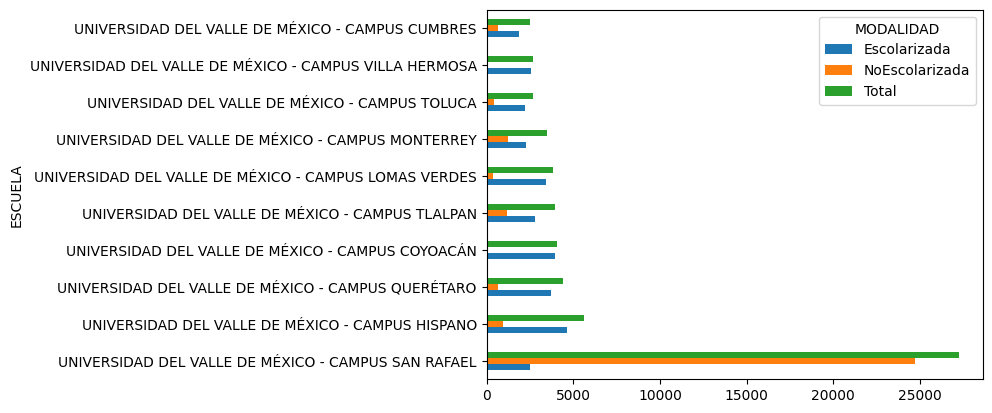

In [73]:
escuelas.plot(x ='ESCUELA', kind = 'barh')
plt.show()

In [74]:
#sns.barplot(x = 'ESCUELA', y = 'Total', data = prueba)
 
# Show the plot
#plt.show()

In [75]:
#SE SACA LA DISTRIBUCION DE ESTUDIANTES POR PROGRAMA DE ESTUDIOS
pivot3 = pd.pivot_table(data=framesUVM,index='PROGRAMA_DE_ESTUDIOS',columns = 'MODALIDAD', values = 'MATRICULA_TOTAL', aggfunc = 'sum',margins = True,margins_name = 'Total')
pivot3.head()

MODALIDAD,Escolarizada,NoEscolarizada,Total
PROGRAMA_DE_ESTUDIOS,,,
ARQUITECTO,289.0,NaN,289
ARQUITECTURA,100.0,NaN,100
CIRUJANO DENTISTA,507.0,NaN,507
ESPECIALIDAD EN DIRECCIÓN DE TALENTO,NaN,13.0,13
ESPECIALIDAD EN FINANZAS,NaN,27.0,27


In [76]:
#SE ACOMODA LA TABLA PIVOTE DE MAYOR A MENOR
pivot3.sort_values(by=['Total'], ascending = False,inplace = True)
pivot3

MODALIDAD,Escolarizada,NoEscolarizada,Total
PROGRAMA_DE_ESTUDIOS,,,
Total,48296.0,33594.0,81890
LICENCIATURA EN DERECHO,3035.0,3259.0,6294
MAESTRÍA EN EDUCACIÓN BASADA EN COMPETENCIAS,280.0,5249.0,5529
LICENCIATURA EN ADMINISTRACIÓN,90.0,4141.0,4231
LICENCIATURA EN ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,3930.0,NaN,3930
...,...,...,...
MAESTRÍA EN EDUCACIÓN,1.0,NaN,1
LICENCIATURA EN INGENIERÍA EN TECNOLOGÍAS DE MANUFACTURA,1.0,NaN,1
LICENCIATURA EN DESARROLLO DE TECNOLOGÍAS DE INFORMACIÓN,NaN,1.0,1


In [77]:
#SE TRANSFORMA LA TABLA PIVOTE EN TABLA NORMAL PARA PODER MANIPULARLA
programa_estudios = pivot3.reset_index()
programa_estudios.sort_values(by=['Total'],inplace=True,ascending=False)
programa_estudios.head()

MODALIDAD,PROGRAMA_DE_ESTUDIOS,Escolarizada,NoEscolarizada,Total
0,Total,48296.0,33594.0,81890
1,LICENCIATURA EN DERECHO,3035.0,3259.0,6294
2,MAESTRÍA EN EDUCACIÓN BASADA EN COMPETENCIAS,280.0,5249.0,5529
3,LICENCIATURA EN ADMINISTRACIÓN,90.0,4141.0,4231
4,LICENCIATURA EN ADMINISTRACIÓN DE NEGOCIOS INT...,3930.0,NaN,3930


In [78]:
#ELIMINAMOS LA ULTIMA FILA DE CADA ARCHIVO
filtrar = programa_estudios['PROGRAMA_DE_ESTUDIOS'] == 'Total'
programa_estudios = programa_estudios.drop(index=programa_estudios[filtrar].index)
programa_estudios = programa_estudios.head(15)

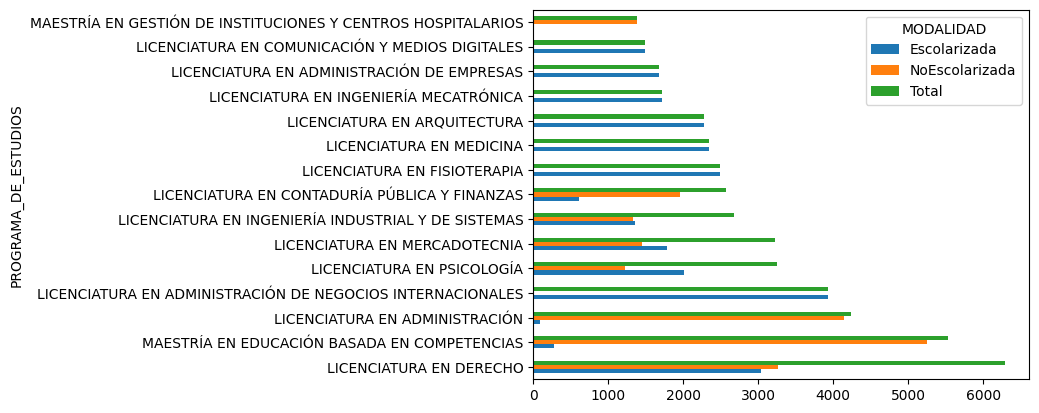

In [79]:
#SE GRAFICAN LOS ESTUDIANTES POR PROGRAMA DE ESTUDIOS
programa_estudios.plot(kind = 'barh', x = 'PROGRAMA_DE_ESTUDIOS')
plt.show()

PREGUNTA #2: UVM´s performance

In [80]:
#Se va a filtrar la base de datos solo para la UVM, pero para todos los ciclos escolares
framesUVM_total=framesfinal[framesfinal["INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR"] == 'UNIVERSIDAD DEL VALLE DE MÉXICO'] 
#framesUVM=framesUVM[framesUVM["CICLO"] == '2020_2021'] 
framesUVM_total.head()

,ENTIDAD_FEDERATIVA,MUNICIPIO,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,PROGRAMA_DE_ESTUDIOS,MATRICULA_MUJERES,MATRICULA_HOMBRES,MATRICULA_TOTAL,PRIMER_INGRESO_MUJERES,PRIMER_INGRESO_HOMBRES,PRIMER_INGRESO_TOTAL,LUGARES_OFERTADOS_TOTAL,MODALIDAD,INSTITUCION,CICLO,TIPO
3,AGUASCALIENTES,AGUASCALIENTES,UNIVERSIDAD DEL VALLE DE MÉXICO,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS AGUAS...,MAESTRÍA EN CIENCIAS DE LA EDUCACIÓN,0,1,1,0,0,0,0,Escolarizada,Particular,2019_2020,Posgrado
141,BAJA CALIFORNIA,MEXICALI,UNIVERSIDAD DEL VALLE DE MÉXICO,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS MEXICALI,MAESTRÍA EN ADMINISTRACIÓN,25,22,47,8,4,12,20,Escolarizada,Particular,2019_2020,Posgrado
142,BAJA CALIFORNIA,MEXICALI,UNIVERSIDAD DEL VALLE DE MÉXICO,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS MEXICALI,MAESTRÍA EN DERECHO FISCAL Y FINANCIERO,0,3,3,0,0,0,0,Escolarizada,Particular,2019_2020,Posgrado
143,BAJA CALIFORNIA,MEXICALI,UNIVERSIDAD DEL VALLE DE MÉXICO,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS MEXICALI,MAESTRÍA EN EDUCACIÓN BASADA EN COMPETENCIAS,29,18,47,11,3,14,20,Escolarizada,Particular,2019_2020,Posgrado
482,CHIHUAHUA,CHIHUAHUA,UNIVERSIDAD DEL VALLE DE MÉXICO,UNIVERSIDAD DEL VALLE DE MÉXICO - CAMPUS CHIHU...,MAESTRÍA EN GESTIÓN DIRECTIVA EN SALUD,23,5,28,2,0,2,2,Escolarizada,Particular,2019_2020,Posgrado


In [81]:
#SE OBTIENE LA DATA AGRUPADA PARA LA MATRICULA TOTAL POR CICLO
pivot4 = pd.pivot_table(data=framesUVM_total,index='CICLO', values = 'MATRICULA_TOTAL', aggfunc = 'sum')
pivot4.head()
matricula = pivot4.reset_index()
matricula

,CICLO,MATRICULA_TOTAL
0,2016_2017,73085
1,2017_2018,79129
2,2018_2019,71727
3,2019_2020,79440
4,2020_2021,81890


In [82]:
pivot5 = pd.pivot_table(data=framesUVM_total,index='CICLO', values = 'PRIMER_INGRESO_TOTAL', aggfunc = 'sum')
pivot5.head()
ingresos = pivot5.reset_index()
ingresos

,CICLO,PRIMER_INGRESO_TOTAL
0,2016_2017,19781
1,2017_2018,21995
2,2018_2019,17964
3,2019_2020,26831
4,2020_2021,27031


In [83]:
growthrate =pd.merge(ingresos, matricula, on = 'CICLO', how='left')
growthrate
growthrate['RATE'] = (growthrate['PRIMER_INGRESO_TOTAL']/growthrate['MATRICULA_TOTAL'])*100
growthrate

,CICLO,PRIMER_INGRESO_TOTAL,MATRICULA_TOTAL,RATE
0,2016_2017,19781,73085,27.065745
1,2017_2018,21995,79129,27.796383
2,2018_2019,17964,71727,25.044962
3,2019_2020,26831,79440,33.775176
4,2020_2021,27031,81890,33.008914


In [84]:
growthrate['RATE'] = round((growthrate['PRIMER_INGRESO_TOTAL']/growthrate['MATRICULA_TOTAL'])*100)
growthrate

,CICLO,PRIMER_INGRESO_TOTAL,MATRICULA_TOTAL,RATE
0,2016_2017,19781,73085,27.0
1,2017_2018,21995,79129,28.0
2,2018_2019,17964,71727,25.0
3,2019_2020,26831,79440,34.0
4,2020_2021,27031,81890,33.0


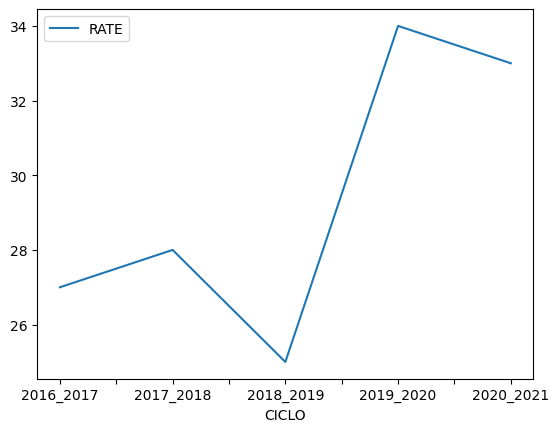

In [85]:
growthrate.plot(kind = 'line', x = 'CICLO', y='RATE')
plt.show()

In [86]:
pivot6 = pd.pivot_table(data=framesUVM_total,index='CICLO', values = 'MATRICULA_TOTAL',columns = 'MODALIDAD', aggfunc = 'sum',margins = True,margins_name = 'Total')
matricula_modalidad = pivot6.reset_index()
matricula_modalidad

MODALIDAD,CICLO,Escolarizada,NoEscolarizada,Total
0,2016_2017,59846,13239,73085
1,2017_2018,61603,17526,79129
2,2018_2019,52545,19182,71727
3,2019_2020,56448,22992,79440
4,2020_2021,48296,33594,81890
5,Total,278738,106533,385271


In [87]:
pivot7 = pd.pivot_table(data=framesUVM_total,index='CICLO', values = 'PRIMER_INGRESO_TOTAL',columns = 'MODALIDAD', aggfunc = 'sum',margins = True,margins_name = 'Total')
pi = pivot7.reset_index()
pi

MODALIDAD,CICLO,Escolarizada,NoEscolarizada,Total
0,2016_2017,15827,3954,19781
1,2017_2018,15170,6825,21995
2,2018_2019,11967,5997,17964
3,2019_2020,12581,14250,26831
4,2020_2021,11599,15432,27031
5,Total,67144,46458,113602


In [88]:
growthrate3 =pd.merge(pi, matricula_modalidad, on = 'CICLO', how='left')
growthrate3['ESC'] = (growthrate3['Escolarizada_x']/growthrate3['Escolarizada_y'])*100
growthrate3['NOESC'] = (growthrate3['NoEscolarizada_x']/growthrate3['NoEscolarizada_y'])*100
growthrate3['TOTAL'] = (growthrate3['Total_x']/growthrate3['Total_y'])*100
growthrate3

MODALIDAD,CICLO,Escolarizada_x,NoEscolarizada_x,Total_x,Escolarizada_y,NoEscolarizada_y,Total_y,ESC,NOESC,TOTAL
0,2016_2017,15827,3954,19781,59846,13239,73085,26.446212,29.866304,27.065745
1,2017_2018,15170,6825,21995,61603,17526,79129,24.625424,38.942143,27.796383
2,2018_2019,11967,5997,17964,52545,19182,71727,22.774764,31.263685,25.044962
3,2019_2020,12581,14250,26831,56448,22992,79440,22.287769,61.978079,33.775176
4,2020_2021,11599,15432,27031,48296,33594,81890,24.016482,45.936774,33.008914
5,Total,67144,46458,113602,278738,106533,385271,24.088571,43.609023,29.486258


In [89]:
growthrate4 = growthrate3[['CICLO','ESC','NOESC','TOTAL']]
growthrate4 = growthrate4.head(5)

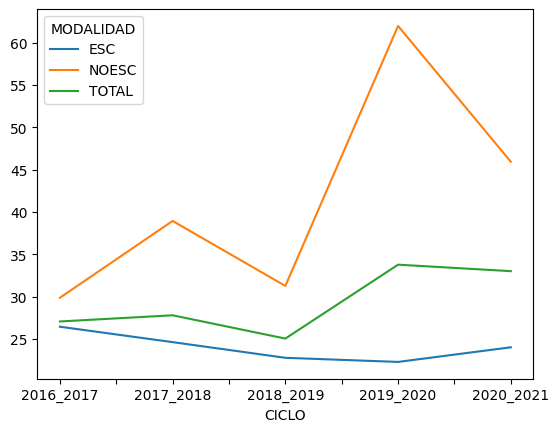

In [90]:
growthrate4.plot(kind = 'line', x = 'CICLO')
plt.show()

Pregunta #3: UVMs competitive landscape

In [91]:
#dISTRIBUCION DEL TOTAL DE ESTUDIANTES 
pivot8 = pd.pivot_table(data=framesfinal,index='CICLO', values = 'MATRICULA_TOTAL',columns = 'MODALIDAD', aggfunc = 'sum',margins = True,margins_name = 'Total')
pivot8 = pivot8.reset_index()
pivot8a = pivot8.head(5)
pivot8a

MODALIDAD,CICLO,Escolarizada,NoEscolarizada,Total
0,2016_2017,3761560,667104,4428664
1,2017_2018,3862948,695938,4558886
2,2018_2019,3942082,761166,4703248
3,2019_2020,4046917,863947,4910864
4,2020_2021,4021826,947174,4969000


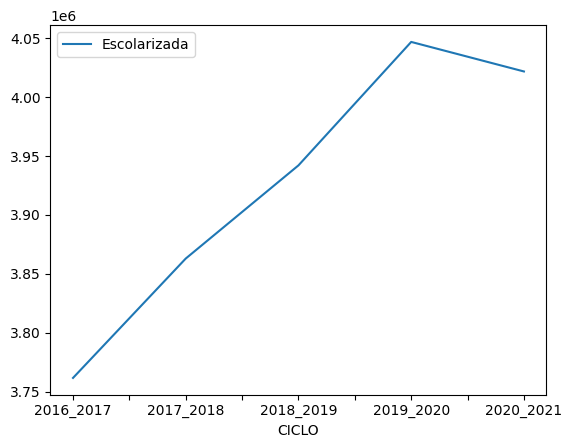

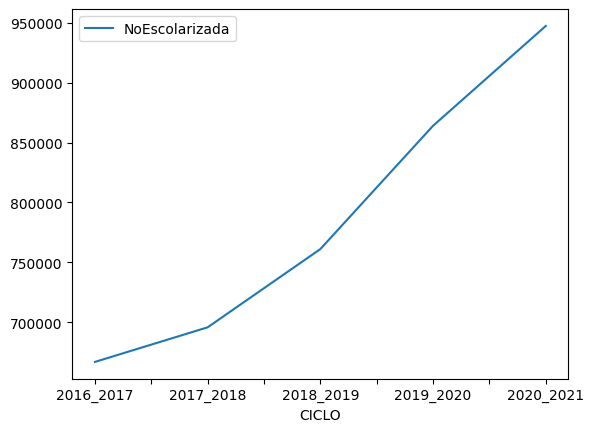

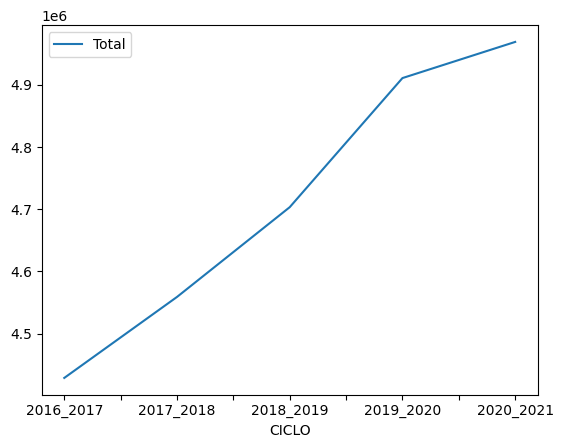

In [92]:
pivot8a.plot(kind = 'line', x = 'CICLO', y = 'Escolarizada')
pivot8a.plot(kind = 'line', x = 'CICLO', y = 'NoEscolarizada')
pivot8a.plot(kind = 'line', x = 'CICLO', y = 'Total')
plt.show()

In [93]:
#VAMOS A SACAR EL GRAFICO PARA ENTENDER EN QUE ESTADOS SE CONCENTRAN LOS ESTUDIANTES
concentrated = framesfinal[['ENTIDAD_FEDERATIVA','MATRICULA_TOTAL','CICLO']]
concentrated.head()

,ENTIDAD_FEDERATIVA,MATRICULA_TOTAL,CICLO
3,AGUASCALIENTES,316,2019_2020
6,AGUASCALIENTES,565,2019_2020
7,AGUASCALIENTES,1066,2019_2020
8,AGUASCALIENTES,130,2019_2020
9,AGUASCALIENTES,711,2019_2020


In [94]:
#df.groupby(['Courses','Duration'])['Fee'].sum()
concentrated_state = concentrated.groupby(['ENTIDAD_FEDERATIVA','CICLO']).sum()
#concentrated.groupby('ENTIDAD_FEDERATIVA').sum()
concentrated_state

MATRICULA_TOTAL
ENTIDAD_FEDERATIVA CICLO                     
AGUASCALIENTES     2016_2017            54920
                   2017_2018            58193
                   2018_2019            62286
                   2019_2020            64278
                   2020_2021            62661
...                                       ...
ZACATECAS          2016_2017            52205
                   2017_2018            54153
                   2018_2019            55255
                   2019_2020            58407
                   2020_2021            57865

[160 rows x 1 columns]

In [117]:
concentrated_state = concentrated_state.reset_index()
concentrated_state

,index,ENTIDAD_FEDERATIVA,CICLO,MATRICULA_TOTAL
0,0,AGUASCALIENTES,2016_2017,54920
1,1,AGUASCALIENTES,2017_2018,58193
2,2,AGUASCALIENTES,2018_2019,62286
3,3,AGUASCALIENTES,2019_2020,64278
4,4,AGUASCALIENTES,2020_2021,62661
...,...,...,...,...
155,155,ZACATECAS,2016_2017,52205
156,156,ZACATECAS,2017_2018,54153
157,157,ZACATECAS,2018_2019,55255
158,158,ZACATECAS,2019_2020,58407


In [118]:
concentrated_state.describe()

,index,MATRICULA_TOTAL
count,160.000000,160.000000
mean,79.500000,147316.637500
std,46.332134,153258.586687
min,0.000000,23543.000000
25%,39.750000,58756.500000
50%,79.500000,101137.000000
75%,119.250000,148980.250000
max,159.000000,846960.000000


In [119]:
concentrated_filtro=concentrated_state['MATRICULA_TOTAL']>=150000
filtered_concentrated = concentrated_state[concentrated_filtro]
filtered_concentrated.head()

,index,ENTIDAD_FEDERATIVA,CICLO,MATRICULA_TOTAL
30,30,CIUDAD DE MÉXICO,2016_2017,769499
31,31,CIUDAD DE MÉXICO,2017_2018,763544
32,32,CIUDAD DE MÉXICO,2018_2019,765734
33,33,CIUDAD DE MÉXICO,2019_2020,796416
34,34,CIUDAD DE MÉXICO,2020_2021,846960


In [120]:
filtered_concentrated.sort_values(by=['ENTIDAD_FEDERATIVA'],inplace=True,ascending=False)
filtered_concentrated.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,ENTIDAD_FEDERATIVA,CICLO,MATRICULA_TOTAL
149,149,VERACRUZ,2020_2021,249379
148,148,VERACRUZ,2019_2020,260028
147,147,VERACRUZ,2018_2019,249706
146,146,VERACRUZ,2017_2018,249155
145,145,VERACRUZ,2016_2017,247151


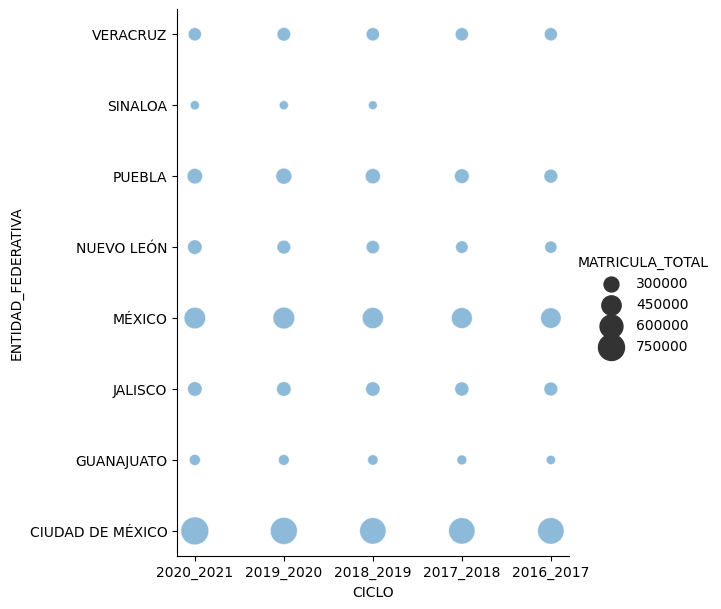

In [121]:
sns.relplot(x="CICLO", y="ENTIDAD_FEDERATIVA", size="MATRICULA_TOTAL",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=filtered_concentrated)
#concentrated_state
#filtered_concentrated
plt.show()

In [100]:
#VAMOS A SACAR LA COMPETENCIA DE LA UVM
competencia = framesfinal[['INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR','MATRICULA_TOTAL','CICLO']]
competencia.head()

,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,MATRICULA_TOTAL,CICLO
3,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,316,2019_2020
6,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,565,2019_2020
7,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,1066,2019_2020
8,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,130,2019_2020
9,INSTITUTO TECNOLÓGICO DE AGUASCALIENTES,711,2019_2020


In [101]:
#df.groupby(['Courses','Duration'])['Fee'].sum()
competencias = competencia.groupby(['INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR','CICLO']).sum()
#concentrated.groupby('ENTIDAD_FEDERATIVA').sum()
competencias

MATRICULA_TOTAL
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR  CICLO                     
17, INSTITUTO DE ESTUDIOS CRÍTICOS 2016_2017               39
                                   2017_2018               70
                                   2018_2019               40
                                   2019_2020               78
1972 AÑO DE JUÁREZ                 2016_2017               41
...                                                       ...
WILBING CENTRO UNIVERSITARIO       2020_2021               97
ÍTACA ESCUELA SUPERIOR DE NEGOCIOS 2017_2018               88
                                   2018_2019               87
                                   2019_2020               66
                                   2020_2021               71

[16624 rows x 1 columns]

In [102]:
competencias = competencias.reset_index()
competencias.head()

,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,CICLO,MATRICULA_TOTAL
0,"17, INSTITUTO DE ESTUDIOS CRÍTICOS",2016_2017,39
1,"17, INSTITUTO DE ESTUDIOS CRÍTICOS",2017_2018,70
2,"17, INSTITUTO DE ESTUDIOS CRÍTICOS",2018_2019,40
3,"17, INSTITUTO DE ESTUDIOS CRÍTICOS",2019_2020,78
4,1972 AÑO DE JUÁREZ,2016_2017,41


In [103]:
competencias.sort_values(by=['MATRICULA_TOTAL'],inplace=True,ascending=False)
competencias.head()

,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,CICLO,MATRICULA_TOTAL
14837,UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO,2020_2021,255414
14836,UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO,2019_2020,248133
14835,UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO,2018_2019,243100
14833,UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO,2016_2017,235929
14834,UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO,2017_2018,233972


In [104]:
#En primer lugar, se va a filtrar la base de datos solo para la UVM, y para el ciclo 2020-2021
competenciasuvm=competencias[competencias["INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR"] == 'UNIVERSIDAD DEL VALLE DE MÉXICO'] 
#framesUVM=framesUVM[framesUVM["CICLO"] == '2020_2021'] 
competenciasuvm.head()

,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,CICLO,MATRICULA_TOTAL
13871,UNIVERSIDAD DEL VALLE DE MÉXICO,2020_2021,81890
13870,UNIVERSIDAD DEL VALLE DE MÉXICO,2019_2020,79440
13868,UNIVERSIDAD DEL VALLE DE MÉXICO,2017_2018,79129
13867,UNIVERSIDAD DEL VALLE DE MÉXICO,2016_2017,73085
13869,UNIVERSIDAD DEL VALLE DE MÉXICO,2018_2019,71727


In [105]:
#CALCULAMOS LA MEDIA DE LA MATRICULA TOTAL DE LA UVM, Y LA COMPETENCIA VAN A SER LOS QUE TENGAN +-10% DE ESE # DE MATRICULA
competenciasuvm.describe()
#MEAN= 77054*1.1 = 84500
#MEAN = 77054*0.9 = 69000

,MATRICULA_TOTAL
count,5.000000
mean,77054.200000
std,4402.141717
min,71727.000000
25%,73085.000000
50%,79129.000000
75%,79440.000000
max,81890.000000


In [106]:
#ENTEDEMOS COMO SE DISTRIBUYEN EN TODA LA BASE
competencias.describe()

,MATRICULA_TOTAL
count,16624.000000
mean,1417.869466
std,7419.920521
min,1.000000
25%,59.000000
50%,205.000000
75%,731.250000
max,255414.000000


In [107]:
#CON LOS LIMITES DE +-10% ENCONTRAMOS A LOS COMPETIDORES
grafica_com= competencias.loc[(competencias['MATRICULA_TOTAL'] >= 69000) & (competencias['MATRICULA_TOTAL'] <= 84500)]
grafica_com

,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,CICLO,MATRICULA_TOTAL
194,BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA,2020_2021,84179
12979,UNIVERSIDAD AUTÓNOMA DE SINALOA,2019_2020,84148
12978,UNIVERSIDAD AUTÓNOMA DE SINALOA,2018_2019,83315
15953,UNIVERSIDAD TECNOLÓGICA DE MÉXICO,2018_2019,82914
12724,UNIVERSIDAD ABIERTA Y A DISTANCIA DE MÉXICO,2019_2020,82141
13871,UNIVERSIDAD DEL VALLE DE MÉXICO,2020_2021,81890
192,BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA,2018_2019,81492
12977,UNIVERSIDAD AUTÓNOMA DE SINALOA,2017_2018,81473
13870,UNIVERSIDAD DEL VALLE DE MÉXICO,2019_2020,79440
13868,UNIVERSIDAD DEL VALLE DE MÉXICO,2017_2018,79129


In [108]:
analisis_competencia = framesfinal.loc[framesfinal['INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR'].isin(['BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA', 'UNIVERSIDAD AUTÓNOMA DE SINALOA','UNIVERSIDAD TECNOLÓGICA DE MÉXICO','UNIVERSIDAD ABIERTA Y A DISTANCIA DE MÉXICO','UNIVERSIDAD DEL VALLE DE MÉXICO'])]
analisis_competencia = analisis_competencia[['ENTIDAD_FEDERATIVA','INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR','ESCUELA','PROGRAMA_DE_ESTUDIOS','MATRICULA_TOTAL','MODALIDAD','TIPO','CICLO']]
analisis_competencia.head()

,ENTIDAD_FEDERATIVA,INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,ESCUELA,PROGRAMA_DE_ESTUDIOS,MATRICULA_TOTAL,MODALIDAD,TIPO,CICLO
6276,PUEBLA,BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA,UNIDAD REGIONAL ACATZINGO,LICENCIATURA EN ADMINISTRACIÓN DE EMPRESAS,191,Escolarizada,Licenciatura,2019_2020
6294,PUEBLA,BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA,COMPLEJO REGIONAL MIXTECA,LICENCIATURA EN ADMINISTRACIÓN DE EMPRESAS,135,Escolarizada,Licenciatura,2019_2020
6295,PUEBLA,BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA,COMPLEJO REGIONAL MIXTECA,LICENCIATURA EN ADMINISTRACIÓN TURÍSTICA,261,Escolarizada,Licenciatura,2019_2020
6296,PUEBLA,BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA,COMPLEJO REGIONAL MIXTECA,LICENCIATURA EN CONTADURÍA PÚBLICA,223,Escolarizada,Licenciatura,2019_2020
6311,PUEBLA,BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA,UNIDAD REGIONAL CHIAUTLA DE TAPIA,LICENCIATURA EN ADMINISTRACIÓN DE EMPRESAS,109,Escolarizada,Licenciatura,2019_2020


In [109]:
len(analisis_competencia)

8815

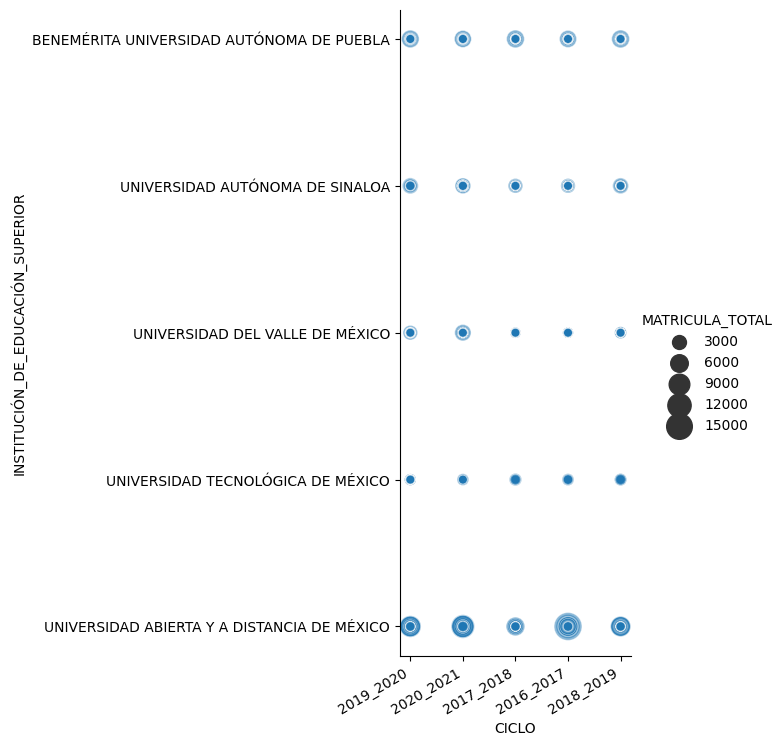

In [110]:
gr= sns.relplot(x="CICLO", y="INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR", size="MATRICULA_TOTAL",
            sizes=(40, 400), alpha=0.5, palette="muted",
            height=7, data=analisis_competencia)
#concentrated_state
plt.xticks(rotation = 30, ha = 'right')
plt.show()

In [111]:
#ENTENDEMOS EN QUE ESTADOS SE ENCUENTRA LA COMPETENCIA
analisis_competencias_t = analisis_competencia.groupby(['INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR','ENTIDAD_FEDERATIVA']).sum()

#analisis_competencia_p = pd.pivot_table(data=analisis_competencia,index='INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', values = 'ENTIDAD_FEDERATIVA', aggfunc = 'count',margins = True,margins_name = 'Total')
analisis_competencias_t = analisis_competencias_t.reset_index()
analisis_competencia_p = pd.pivot_table(data=analisis_competencias_t,index='INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', values = 'ENTIDAD_FEDERATIVA', aggfunc = 'count')
analisis_competencia_p.sort_values(by=['ENTIDAD_FEDERATIVA'],inplace=True,ascending=False)
analisis_competencia_p

,ENTIDAD_FEDERATIVA
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,
UNIVERSIDAD DEL VALLE DE MÉXICO,18
UNIVERSIDAD TECNOLÓGICA DE MÉXICO,5
BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA,1
UNIVERSIDAD ABIERTA Y A DISTANCIA DE MÉXICO,1
UNIVERSIDAD AUTÓNOMA DE SINALOA,1


In [112]:
#ENTENDEMOS CUANTAS ESCUELAS TIENE LA COMPETENCIA
analisis_competencias_t = analisis_competencia.groupby(['INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR','ESCUELA']).sum()

#analisis_competencia_p = pd.pivot_table(data=analisis_competencia,index='INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', values = 'ENTIDAD_FEDERATIVA', aggfunc = 'count',margins = True,margins_name = 'Total')
analisis_competencias_t = analisis_competencias_t.reset_index()
analisis_competencia_p = pd.pivot_table(data=analisis_competencias_t,index='INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', values = 'ESCUELA', aggfunc = 'count')
analisis_competencia_p.sort_values(by=['ESCUELA'],inplace=True,ascending=False)
analisis_competencia_p

,ESCUELA
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,
UNIVERSIDAD AUTÓNOMA DE SINALOA,69
BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA,51
UNIVERSIDAD DEL VALLE DE MÉXICO,41
UNIVERSIDAD TECNOLÓGICA DE MÉXICO,11
UNIVERSIDAD ABIERTA Y A DISTANCIA DE MÉXICO,2


In [113]:
#ANALISIS POR NIVEL DE ESTUDIOS
analisis_competencias_t = analisis_competencia.groupby(['INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR','PROGRAMA_DE_ESTUDIOS','TIPO']).sum()

#analisis_competencia_p = pd.pivot_table(data=analisis_competencia,index='INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', values = 'ENTIDAD_FEDERATIVA', aggfunc = 'count',margins = True,margins_name = 'Total')
analisis_competencias_t = analisis_competencias_t.reset_index()
analisis_competencia_p = pd.pivot_table(data=analisis_competencias_t,index='INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', columns='TIPO', values = 'PROGRAMA_DE_ESTUDIOS', aggfunc = 'count',margins = True,margins_name='Total')
analisis_competencia_p.sort_values(by=['Total'],inplace=True,ascending=False)
#dfStyler = analisis_competencia_p.style.set_properties(**{'text-align': 'right'})
#analisis_competencia_p = analisis_competencia_p.loc[analisis_competencia_p['INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR'].isin(['BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA', 'UNIVERSIDAD AUTÓNOMA DE SINALOA','UNIVERSIDAD TECNOLÓGICA DE MÉXICO','UNIVERSIDAD ABIERTA Y A DISTANCIA DE MÉXICO','UNIVERSIDAD DEL VALLE DE MÉXICO'])]
analisis_competencia_p

TIPO,Licenciatura,Posgrado,Total
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,,,
Total,559,367,926
BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA,139,133,272
UNIVERSIDAD DEL VALLE DE MÉXICO,161,90,251
UNIVERSIDAD AUTÓNOMA DE SINALOA,123,97,220
UNIVERSIDAD TECNOLÓGICA DE MÉXICO,92,44,136
UNIVERSIDAD ABIERTA Y A DISTANCIA DE MÉXICO,44,3,47


In [114]:
#ANALISIS POR ESCOLARIZADA Y NO ESCOLARIZADA
analisis_competencias_t = analisis_competencia.groupby(['INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR','PROGRAMA_DE_ESTUDIOS','MODALIDAD']).sum()

#analisis_competencia_p = pd.pivot_table(data=analisis_competencia,index='INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', values = 'ENTIDAD_FEDERATIVA', aggfunc = 'count',margins = True,margins_name = 'Total')
analisis_competencias_t = analisis_competencias_t.reset_index()
analisis_competencia_p = pd.pivot_table(data=analisis_competencias_t,index='INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', columns='MODALIDAD', values = 'PROGRAMA_DE_ESTUDIOS', aggfunc = 'count',margins = True,margins_name='Total')
analisis_competencia_p.sort_values(by=['Total'],inplace=True,ascending=False)
#dfStyler = analisis_competencia_p.style.set_properties(**{'text-align': 'right'})
#analisis_competencia_p.loc[(analisis_competencia_p['Total'] > 1087)]
analisis_competencia_p

MODALIDAD,Escolarizada,NoEscolarizada,Total
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,,,
Total,772.0,269.0,1041
UNIVERSIDAD DEL VALLE DE MÉXICO,193.0,104.0,297
BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA,264.0,17.0,281
UNIVERSIDAD AUTÓNOMA DE SINALOA,209.0,33.0,242
UNIVERSIDAD TECNOLÓGICA DE MÉXICO,106.0,68.0,174
UNIVERSIDAD ABIERTA Y A DISTANCIA DE MÉXICO,NaN,47.0,47


In [115]:
#ANALISIS A TRAVES DE LOS CICLOS, POR UNIVERSIDAD
analisis_competencias_t = analisis_competencia.groupby(['INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR','PROGRAMA_DE_ESTUDIOS','CICLO']).sum()

#analisis_competencia_p = pd.pivot_table(data=analisis_competencia,index='INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', values = 'ENTIDAD_FEDERATIVA', aggfunc = 'count',margins = True,margins_name = 'Total')
analisis_competencias_t = analisis_competencias_t.reset_index()
analisis_competencia_p = pd.pivot_table(data=analisis_competencias_t,index='INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR', columns='CICLO', values = 'MATRICULA_TOTAL', aggfunc = 'sum',margins = True,margins_name='Total')
analisis_competencia_p.sort_values(by=['Total'],inplace=True,ascending=False)
#dfStyler = analisis_competencia_p.style.set_properties(**{'text-align': 'right'})
#analisis_competencia_p.loc[(analisis_competencia_p['Total'] > 1087)]
analisis_competencia_p

CICLO,2016_2017,2017_2018,2018_2019,2019_2020,2020_2021,Total
INSTITUCIÓN_DE_EDUCACIÓN_SUPERIOR,,,,,,
Total,399077,365226,391922,415958,430255,2002438
UNIVERSIDAD ABIERTA Y A DISTANCIA DE MÉXICO,105785,51998,72474,82141,101901,414299
UNIVERSIDAD AUTÓNOMA DE SINALOA,78200,81473,83315,84148,84751,411887
BENEMÉRITA UNIVERSIDAD AUTÓNOMA DE PUEBLA,74040,78761,81492,85321,84179,403793
UNIVERSIDAD TECNOLÓGICA DE MÉXICO,67967,73865,82914,84908,77534,387188
UNIVERSIDAD DEL VALLE DE MÉXICO,73085,79129,71727,79440,81890,385271
